In [13]:
import matplotlib.pyplot as plt

# Function to read DOSCAR and extract energy and TDOS
def read_doscar(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()

    n_dos = int(lines[5].split()[2])             # number of DOS points
    fermi_energy = float(lines[5].split()[3])    # Fermi level

    energies = []
    dos_total = []

    data_lines = lines[6:6 + n_dos]
    for line in data_lines:                      # loop through each line of DOS data    
        parts = line.split()        
        energy = float(parts[0]) - fermi_energy  # energy relative to Fermi level
        dos = float(parts[1])                    # total DOS (spin up)
        energies.append(energy)
        dos_total.append(dos)

    return energies, dos_total # returns the two lists, so they can be used for plotting

# Function that estimate the band gap from DOS: look for where DOS is ~0 around the Fermi level
def estimate_band_gap(energies, dos, threshold=0.01):
    inside_gap = [e for e, d in zip(energies, dos) if abs(d) < threshold]
    if not inside_gap:
        return 0
    gap_min = min(inside_gap)
    gap_max = max(inside_gap)
    gap = round(gap_max - gap_min, 2)
    return gap


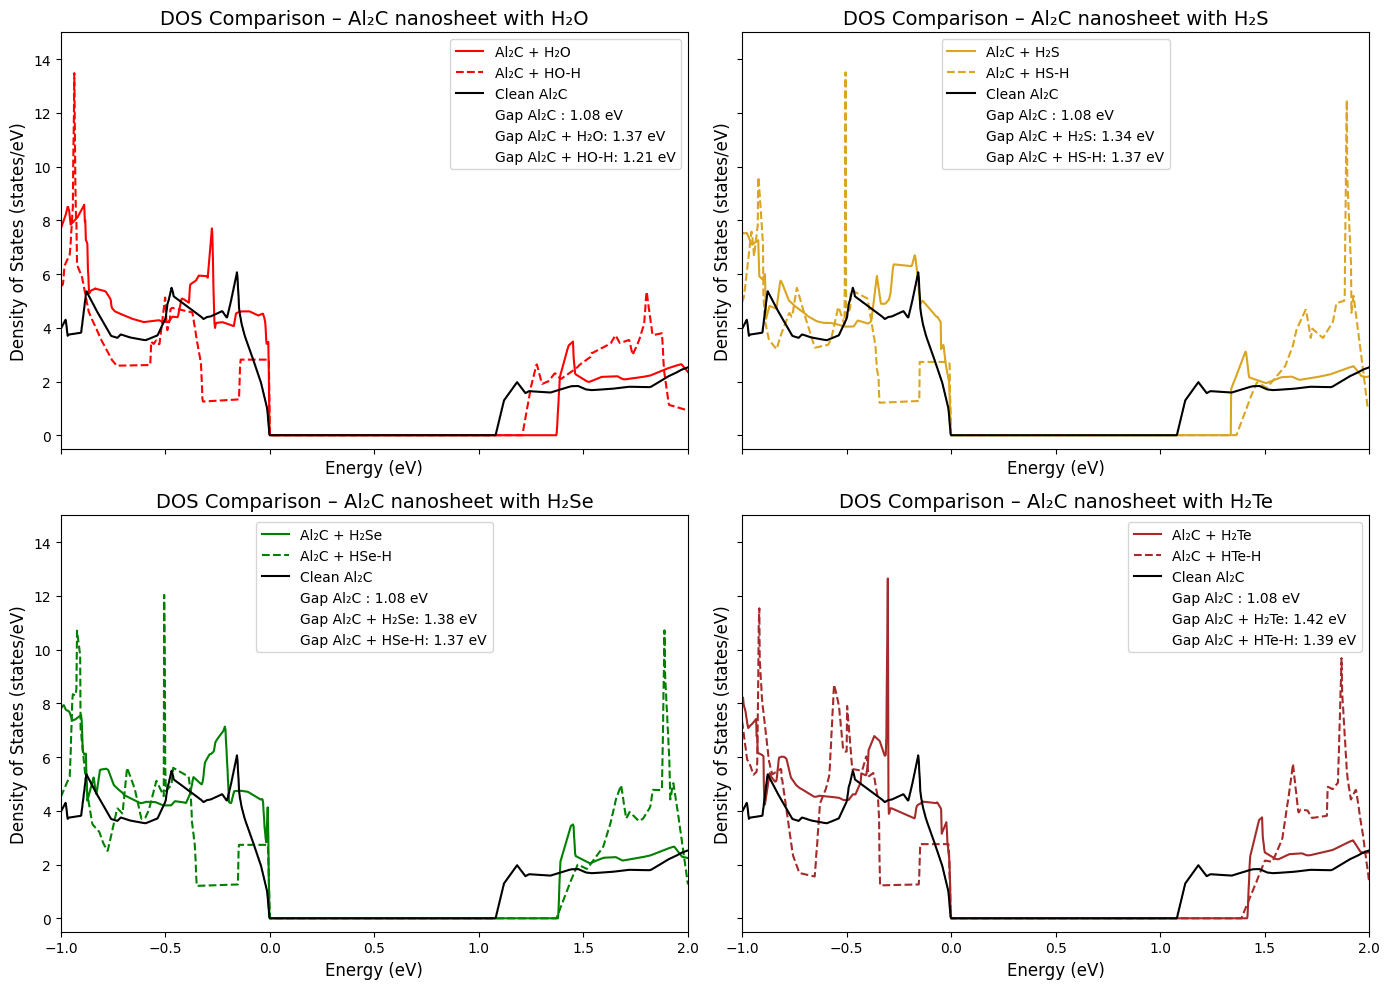

In [23]:
# Read DOS for clean Al2C and calculete the band gap
energies_clean, dos_clean = read_doscar('DOSCAR_Al2C')
gap_clean = estimate_band_gap(energies_clean, dos_clean)

# Define systems and their colors
systems = [
    ('H₂O', 'DOSCAR_H2O', 'DOSCAR_HO-H', 'red'),
    ('H₂S', 'DOSCAR_H2S', 'DOSCAR_HS-S', '#DAA520'),
    ('H₂Se', 'DOSCAR_H2Se', 'DOSCAR_HSe-H', 'green'),
    ('H₂Te', 'DOSCAR_H2Te', 'DOSCAR_HTe-H', 'brown')
]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each system
for i, (label, doscar_h2x, doscar_hx_h, color) in enumerate(systems):
    energies1, dos1 = read_doscar(doscar_h2x)         # read DOSCAR A2C + H2X
    energies2, dos2 = read_doscar(doscar_hx_h)        # read DOSCAR A2C + HX-H
    gap1 = estimate_band_gap(energies1, dos1)         # calculate band gap A2C + HX-H
    gap2 = estimate_band_gap(energies2, dos2)         # calculate band gap A2C + H2X

    ax = axes[i]
    ax.plot(energies1, dos1, color=color, label=f'Al₂C + {label}')
    ax.plot(energies2, dos2, color=color, linestyle='--', label=f'Al₂C + {label.replace("₂", "")}-H')
    ax.plot(energies_clean, dos_clean, color='black', label='Clean Al₂C')

    ax.plot([], [], ' ', label=f'Gap Al₂C : {gap_clean} eV')
    ax.plot([], [], ' ', label=f'Gap Al₂C + {label}: {gap1} eV')
    ax.plot([], [], ' ', label=f'Gap Al₂C + {label.replace("₂", "")}-H: {gap2} eV')

    ax.set_xlabel('Energy (eV)', fontsize=12)
    ax.set_ylabel('Density of States (states/eV)', fontsize=12)
    ax.set_title(f'DOS Comparison – Al₂C nanosheet with {label}', fontsize=14)
    ax.set_xlim(-1, 2)
    ax.set_ylim(-0.5, 15)
    ax.legend()
    ax.grid(False)

# Adjust layout
plt.tight_layout()
plt.savefig('dos_plot.png', dpi=300)
plt.show()
